In [1]:
import pandas as pd
import numpy as np

## **Dataset review**

In [2]:
df = pd.read_csv("weather_data.csv")
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


## **Data Pre-processing**

In [3]:
from sklearn.preprocessing import  StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


In [4]:
df.describe()

,avg_temperature,humidity,avg_wind_speed,cloud_cover,pressure
count,296.000000,296.000000,296.000000,296.000000,311.000000
mean,25.983840,55.041385,7.556636,49.834827,1001.059119
std,6.802475,19.220133,5.344683,29.009459,28.835595
min,15.000000,30.000000,0.069480,0.321826,951.240404
25%,20.265692,34.280826,3.550354,24.530951,975.757545
50%,27.177958,56.759806,7.326421,50.725120,1001.938586
75%,32.204599,72.189837,11.050627,76.046506,1026.578884
max,35.000000,90.000000,56.636041,99.834751,1049.543752


### **Data types**

In [5]:
df.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

### **Missing Values**

In [6]:
df.isna().sum()

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [7]:
df_processed = df.copy() # intializing to create another pre-processed dataframe

### **Data pre-processing Pipeline**

In [8]:
class ConvertToNum(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X['avg_temperature'] = X['avg_temperature'].apply(lambda x: float(x))
        X['humidity'] = X['humidity'].apply(lambda x: float(x))
        X['avg_wind_speed'] = X['avg_wind_speed'].apply(lambda x: float(x))
        X['cloud_cover'] = X['cloud_cover'].apply(lambda x: float(x))
        X['pressure'] = X['pressure'].apply(lambda x: float(x))
        return X

columns_to_scale = ['avg_temperature','humidity','avg_wind_speed','cloud_cover','pressure']
class Missingval(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X['avg_temperature'].fillna(X['avg_temperature'].median(), inplace=True)
        X['humidity'].fillna(X['humidity'].median(), inplace=True)
        X['avg_wind_speed'].fillna(X['avg_wind_speed'].median(), inplace=True)
        X['cloud_cover'].fillna(X['cloud_cover'].median(), inplace=True)
        X['pressure'].fillna(X['pressure'].median(), inplace=True)
        return X
    
class StandadizeData(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        scaler = StandardScaler()
        X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
        return X
    
    
class TargetEncode(BaseEstimator, TransformerMixin):
    def fit(self, X,y=None):
        return self

    def transform(self,X):
        X['rain_or_not'] = X['rain_or_not'].apply(lambda x: 1 if x=="Rain" else 0)
        return X
    
class DataEncoder(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X['month'] = X['date'].apply(lambda x: x.split("-")[1]) 
        X['day'] = X['date'].apply(lambda x: x.split("-")[2])
        X = X.drop('date', axis=1)
        return X
        
class DateTime(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        X['date'] = pd.to_datetime(X['date'])
        # X['day_of_week'] = X['date'].dt.dayofweek
        # X['day_of_year'] = X['date'].dt.dayofyear
        # X['week_of_year'] = X['date'].dt.weekofyear
        # X = X.drop('date', axis=1)
        return X
      
data_preprocessing_pipeline = Pipeline(steps=[
    ('TypeCastToNum', ConvertToNum()),
    ('Missingval', Missingval()),
    ('StandadizeData', StandadizeData()),
    ('DataEncoder', DataEncoder()),
    ('TargetEncode', TargetEncode())
])




In [9]:
df_processed = data_preprocessing_pipeline.fit_transform(df_processed)


C:\Users\User\AppData\Local\Temp\ipykernel_22028\748844037.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['avg_temperature'].fillna(X['avg_temperature'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22028\748844037.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [10]:
df_processed.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,01,01
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,01,02
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,01,03
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,01,04
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,01,05


In [11]:
df_processed.isna().sum()

avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
month              0
day                0
dtype: int64

In [12]:
df_processed.describe()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
count,3.110000e+02,3.110000e+02,3.110000e+02,311.000000,3.110000e+02,3.110000e+02
mean,1.028116e-16,4.569407e-16,7.425286e-17,0.636656,-2.855879e-17,8.674733e-16
std,1.001612e+00,1.001612e+00,1.001612e+00,0.481738,1.001612e+00,1.001612e+00
min,-1.665345e+00,-1.341906e+00,-1.436151e+00,0.000000,-1.753943e+00,-1.730466e+00
25%,-8.367950e-01,-1.038202e+00,-7.364830e-01,0.000000,-8.466853e-01,-8.788565e-01
50%,1.714184e-01,8.735538e-02,-4.209132e-02,1.000000,2.999052e-02,3.054851e-02
75%,8.773980e-01,9.001727e-01,6.438495e-01,1.000000,8.595001e-01,8.864354e-01
max,1.351192e+00,1.862740e+00,9.430295e+00,1.000000,1.768137e+00,1.684126e+00


## **Exploratory Data Analysis**


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

### **Correlation Analysis (Heatmap)**

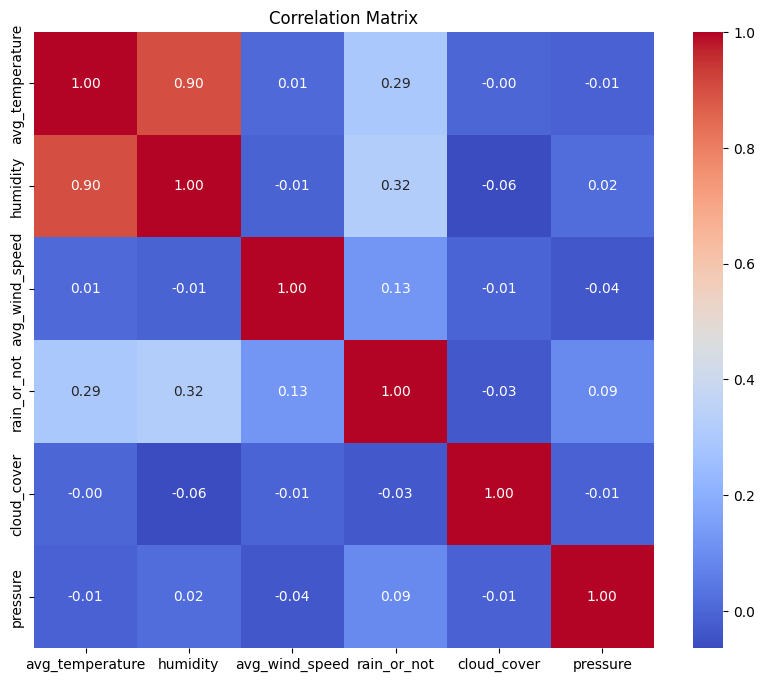

In [26]:

df_without_date = df_processed.drop(['day', 'month'], axis=1)
corr_matrix = df_without_date.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig("correlation_matrix.png")
plt.show()

### **Boxplots for Outlier Detection**

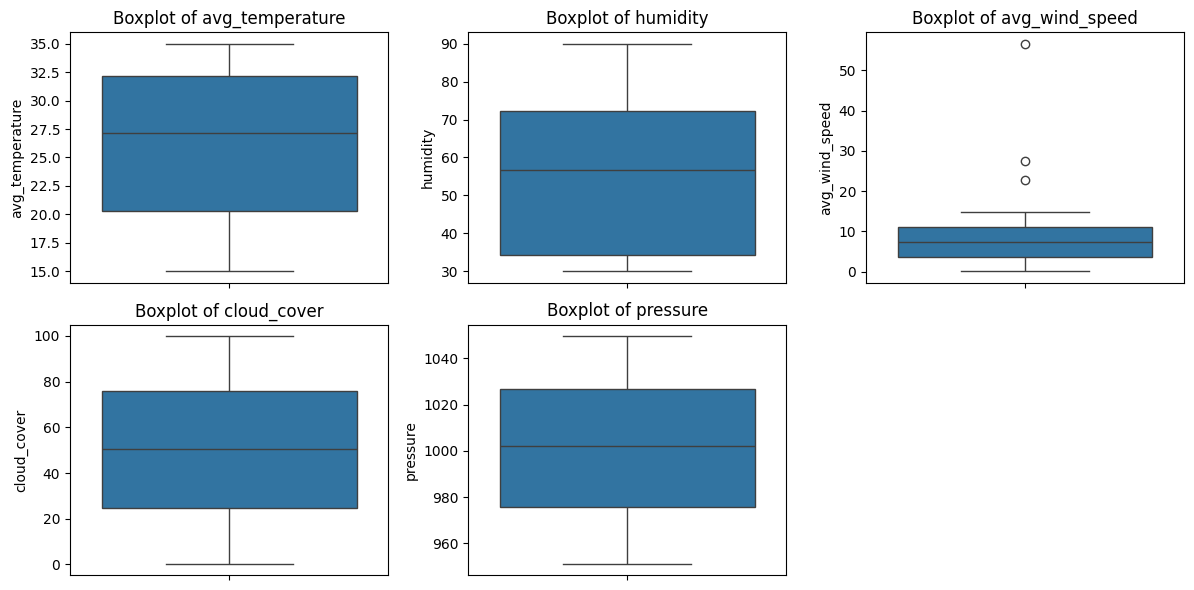

In [15]:
features = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover', 'pressure']

plt.figure(figsize=(12,6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### **Feature Distributions (Histograms & KDE Plots)**

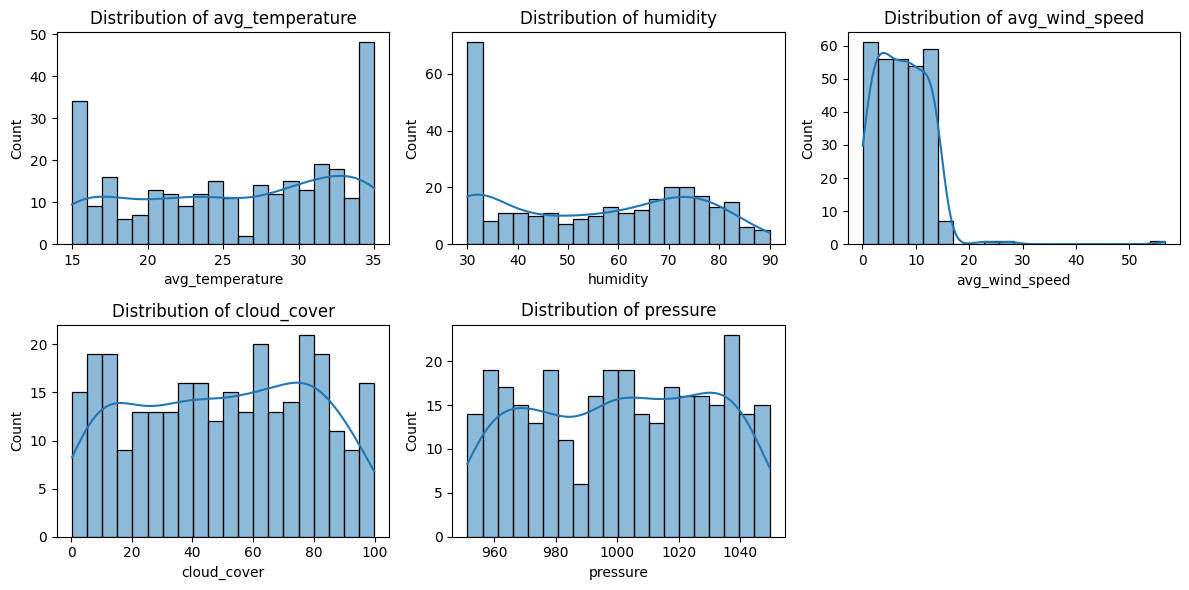

In [16]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


### **Rain Probability by Feature (Violin & Boxplots)**

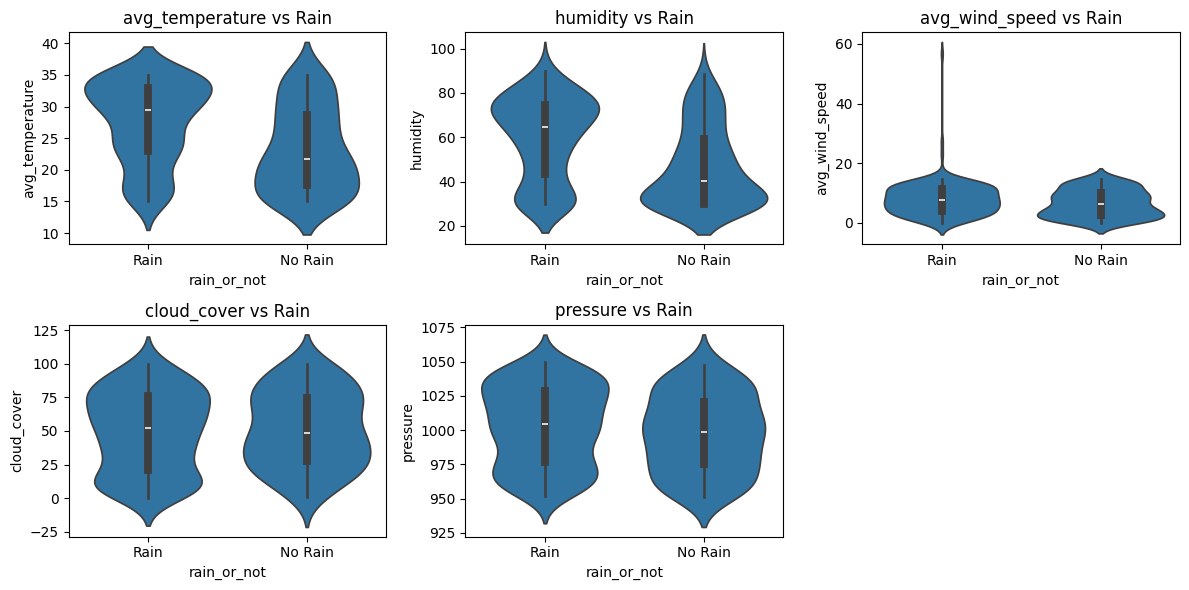

In [27]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=df['rain_or_not'], y=df[feature])
    plt.title(f'{feature} vs Rain')
plt.tight_layout()
plt.savefig('rain probability vs features.png')
plt.show()


### **Pairplots (Feature Interactions)**

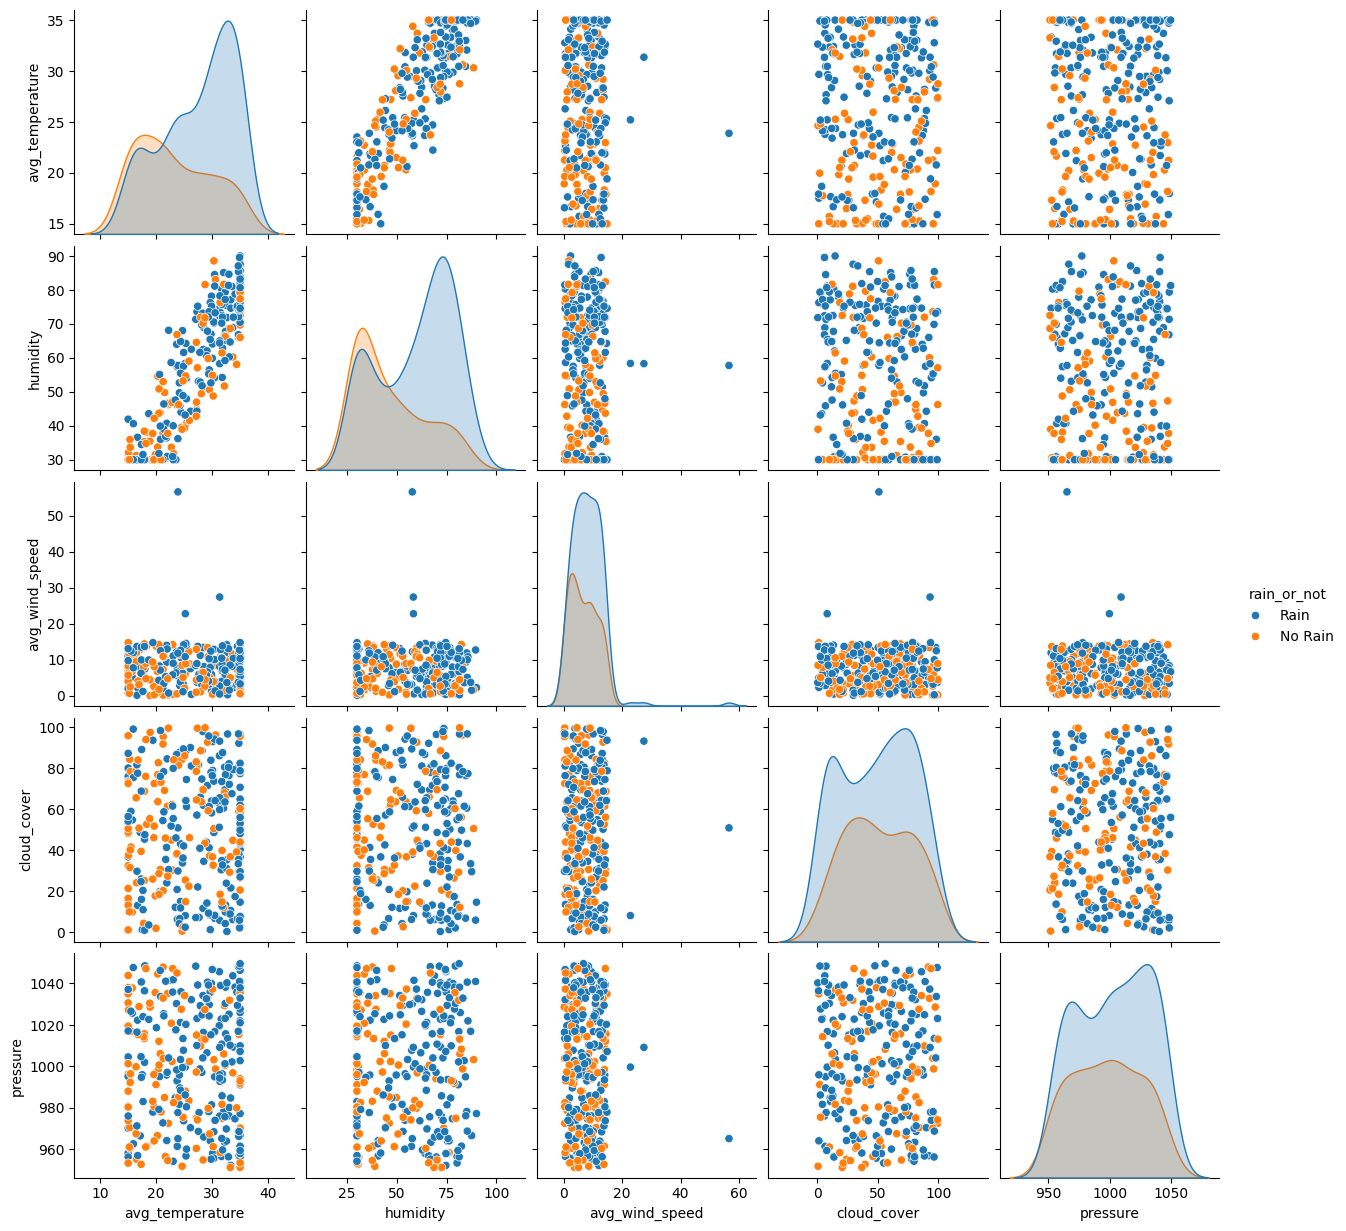

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.pairplot(df, hue="rain_or_not", diag_kind="kde")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22028\748844037.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['avg_temperature'].fillna(X['avg_temperature'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22028\748844037.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

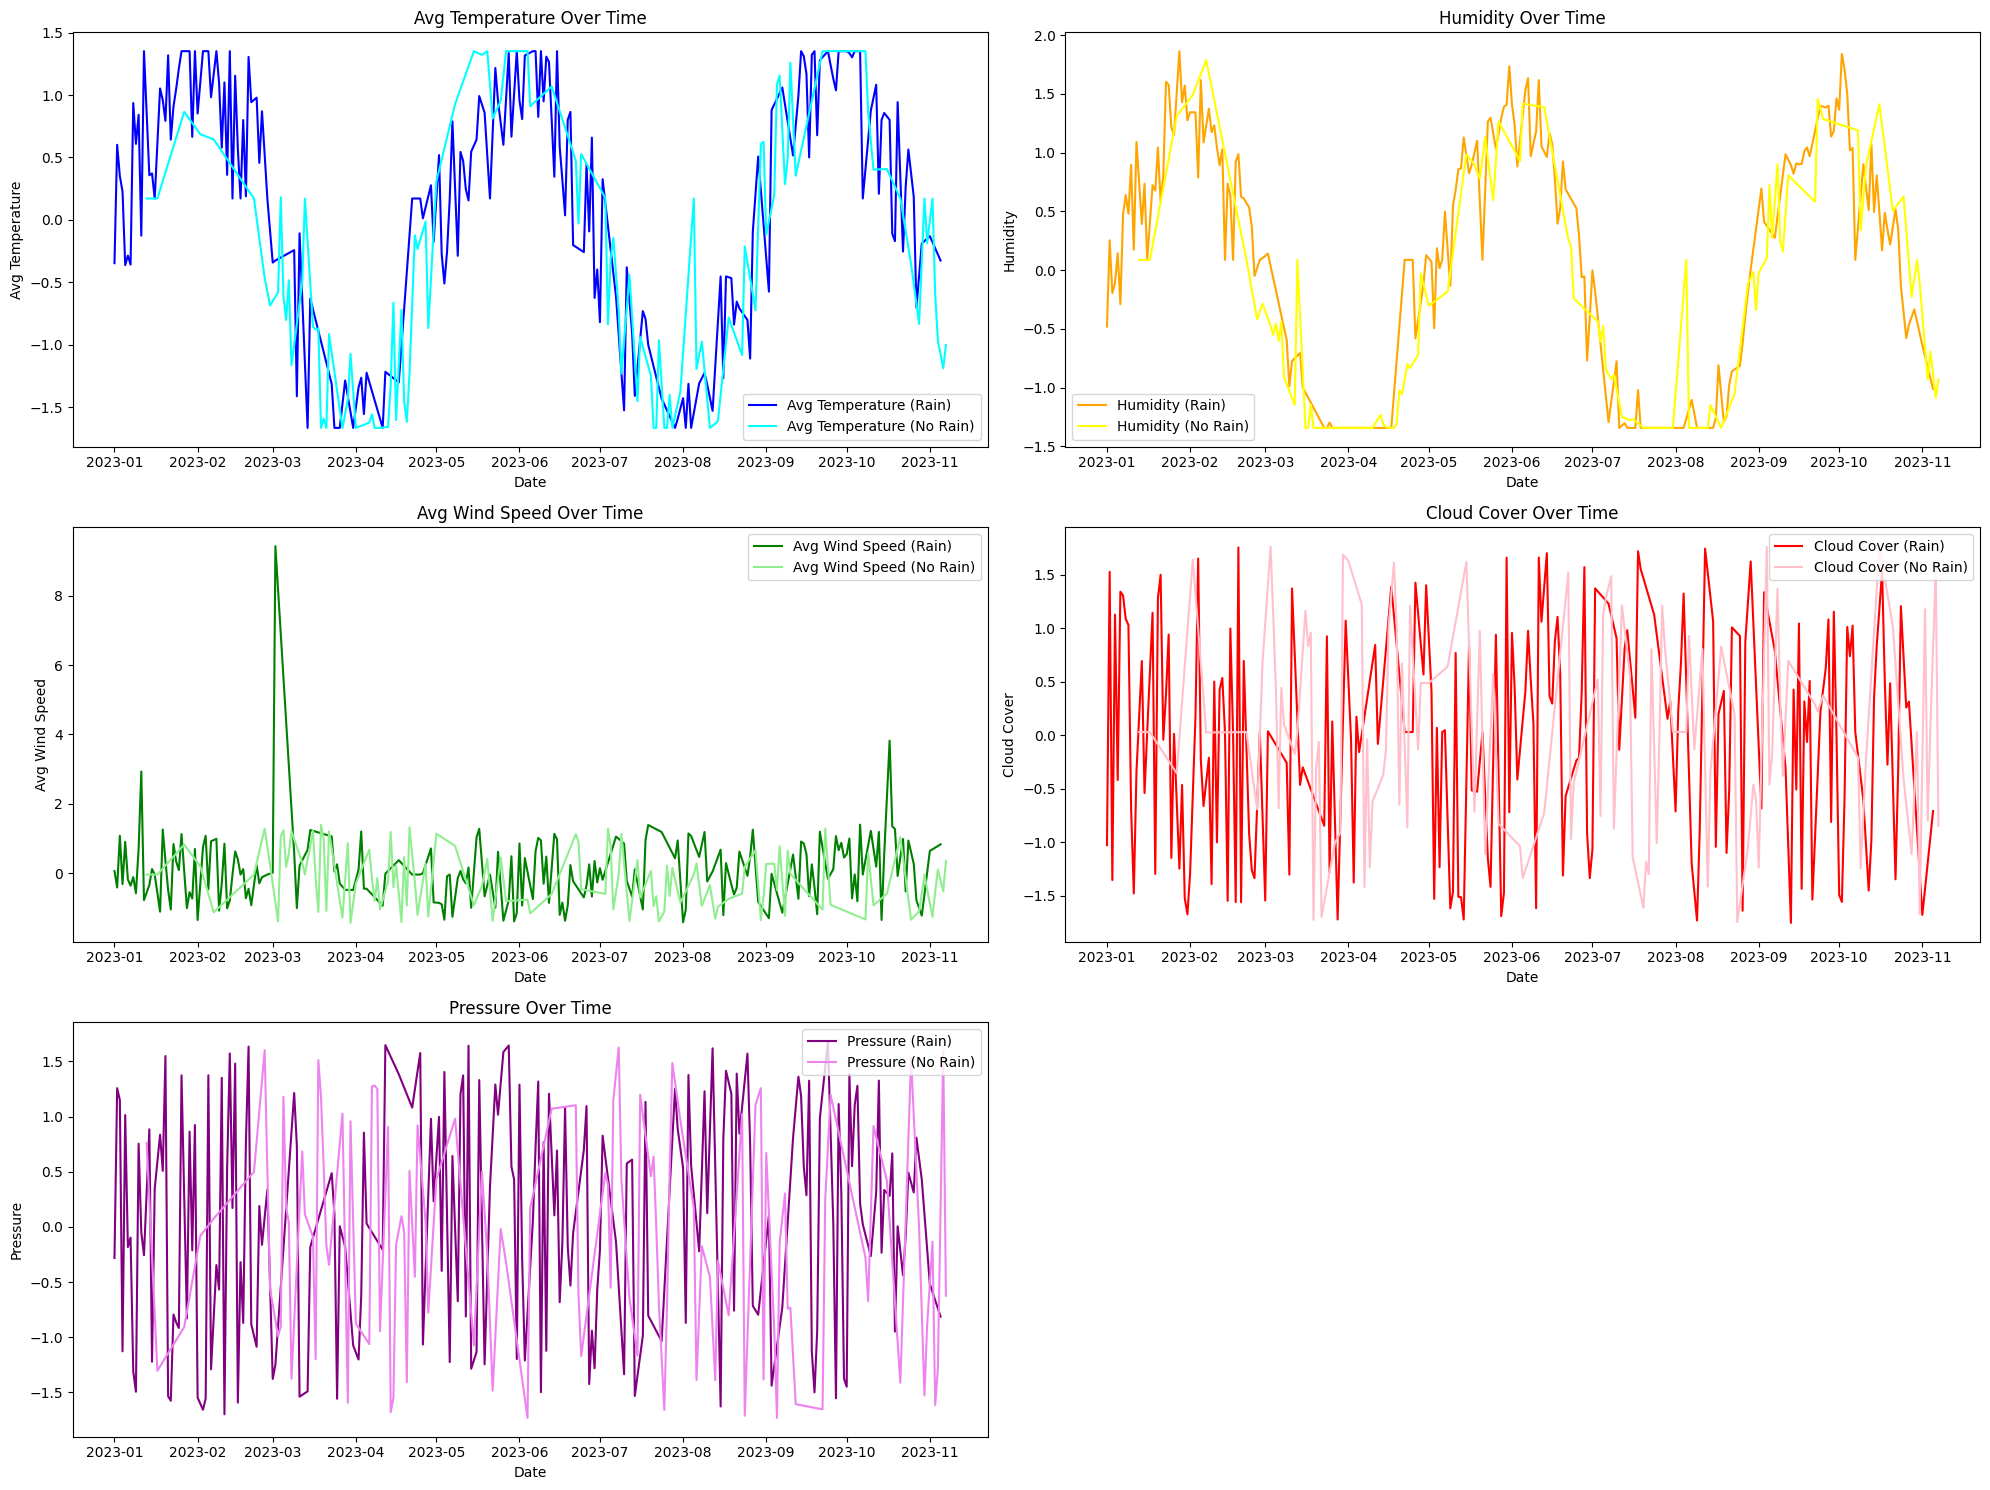

In [30]:
# Plotting time series data for different features

data_preprocessing_pipeline_2 = Pipeline(steps=[
    ('TypeCastToNum', ConvertToNum()),
    ('Missingval', Missingval()),
    ('StandadizeData', StandadizeData()),
    ('DataEncoder', DateTime()),
    ('TargetEncode', TargetEncode())
])

df_with_date = df.copy()
df_with_date = data_preprocessing_pipeline_2.fit_transform(df_with_date)
plt.figure(figsize=(20, 15))

# Plot avg_temperature over time
# Plot avg_temperature over time
plt.subplot(3, 2, 1)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['avg_temperature'], label='Avg Temperature (Rain)', color='blue')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['avg_temperature'], label='Avg Temperature (No Rain)', color='cyan')
plt.xlabel('Date')
plt.ylabel('Avg Temperature')
plt.title('Avg Temperature Over Time')
plt.legend()

# Plot humidity over time
plt.subplot(3, 2, 2)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['humidity'], label='Humidity (Rain)', color='orange')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['humidity'], label='Humidity (No Rain)', color='yellow')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Over Time')
plt.legend()

# Plot avg_wind_speed over time
plt.subplot(3, 2, 3)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['avg_wind_speed'], label='Avg Wind Speed (Rain)', color='green')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['avg_wind_speed'], label='Avg Wind Speed (No Rain)', color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Avg Wind Speed')
plt.title('Avg Wind Speed Over Time')
plt.legend()

# Plot cloud_cover over time
plt.subplot(3, 2, 4)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['cloud_cover'], label='Cloud Cover (Rain)', color='red')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['cloud_cover'], label='Cloud Cover (No Rain)', color='pink')
plt.xlabel('Date')
plt.ylabel('Cloud Cover')
plt.title('Cloud Cover Over Time')
plt.legend()

# Plot pressure over time
plt.subplot(3, 2, 5)
plt.plot(df_with_date[df_with_date['rain_or_not'] == 1]['date'], df_with_date[df_with_date['rain_or_not'] == 1]['pressure'], label='Pressure (Rain)', color='purple')
plt.plot(df_with_date[df_with_date['rain_or_not'] == 0]['date'], df_with_date[df_with_date['rain_or_not'] == 0]['pressure'], label='Pressure (No Rain)', color='violet')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.title('Pressure Over Time')
plt.legend()

plt.tight_layout()
plt.savefig('time_series_data.png')
plt.show()

In [20]:
df_with_date.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128
1,2023-01-02,0.601659,0.253825,-0.415527,1,1.528340,1.257899
2,2023-01-03,0.350490,-0.195465,1.078158,1,-1.353475,1.150926
3,2023-01-04,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123
4,2023-01-05,-0.362306,0.144312,0.903535,1,-0.418186,1.014450


In [21]:
df_processed.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,month,day
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,01,01
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,01,02
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,01,03
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,01,04
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,01,05


## **Model Building and Training**

In [22]:
df_processed_final = df_processed.drop(['month','day'], axis=1)
df_processed_final = df_processed_final[df_processed_final['avg_wind_speed'] < df_processed_final['avg_wind_speed'].quantile(0.95)]
df_processed_final = df_processed_final[df_processed_final['avg_temperature'] < df_processed_final['avg_temperature'].quantile(0.95)]
df_processed_final = df_processed_final[df_processed_final['humidity'] < df_processed_final['humidity'].quantile(0.95)]
# df_processed_final = df_processed_final[df_processed_final['cloud_cover'] < 0.5]
# df_processed_final = df_processed_final[df_processed_final['pressure'] > -1]
df_processed_final['dew_point'] = df_processed_final['avg_temperature'] - ((100 - df_processed_final['humidity']) / 5)

# df_processed_final = df_processed_final[df_processed_final['pressure'] < 1]
df_processed_final.shape

(250, 7)

In [23]:
df_processed_final.head()

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,dew_point
0,-0.346303,-0.479808,0.057716,1,-1.027348,-0.281128,-20.442265
1,0.601659,0.253825,-0.415527,1,1.528340,1.257899,-19.347576
2,0.350490,-0.195465,1.078158,1,-1.353475,1.150926,-19.688603
3,0.227672,-0.107915,-0.318667,1,1.127882,-1.127123,-19.793910
4,-0.362306,0.144312,0.903535,1,-0.418186,1.014450,-20.333443


Logistic Regression Best Params: {'C': 1}
Logistic Regression F1 Score: 0.7428571428571429
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        21
           1       0.63      0.90      0.74        29

    accuracy                           0.64        50
   macro avg       0.65      0.59      0.57        50
weighted avg       0.65      0.64      0.60        50

Logistic Regression Accuracy: 0.64
------------------------------------------------------


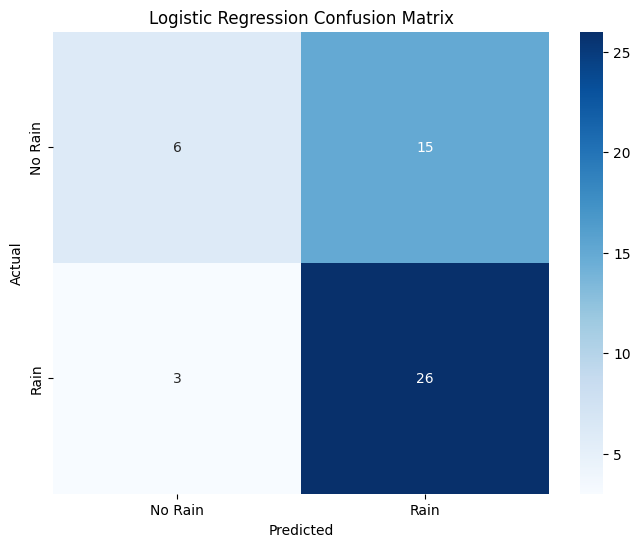

Random Forest Best Params: {'n_estimators': 200}
Random Forest F1 Score: 0.71875
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.66      0.79      0.72        29

    accuracy                           0.64        50
   macro avg       0.63      0.61      0.61        50
weighted avg       0.63      0.64      0.63        50

Random Forest Accuracy: 0.64
------------------------------------------------------


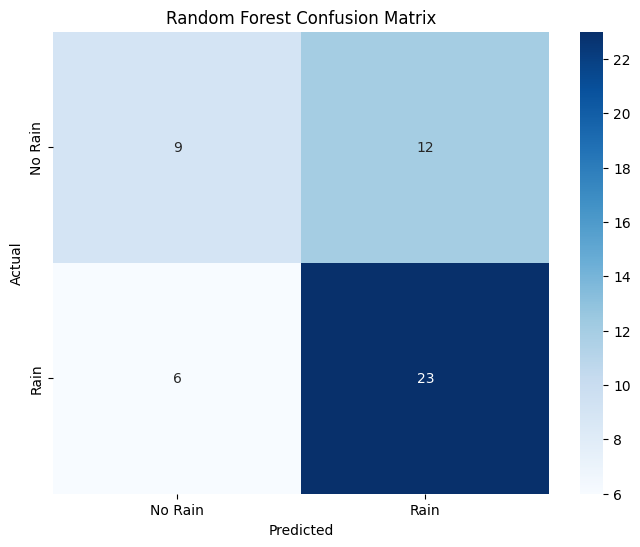

SVM Best Params: {'C': 0.1, 'kernel': 'rbf'}
SVM F1 Score: 0.7341772151898734
SVM Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50

SVM Accuracy: 0.58
------------------------------------------------------


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

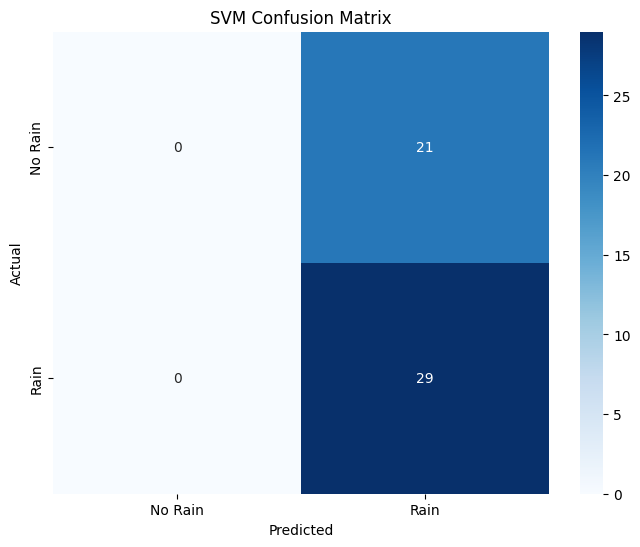

Decision Tree Best Params: {'max_depth': None}
Decision Tree F1 Score: 0.711864406779661
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        21
           1       0.70      0.72      0.71        29

    accuracy                           0.66        50
   macro avg       0.65      0.65      0.65        50
weighted avg       0.66      0.66      0.66        50

Decision Tree Accuracy: 0.66
------------------------------------------------------


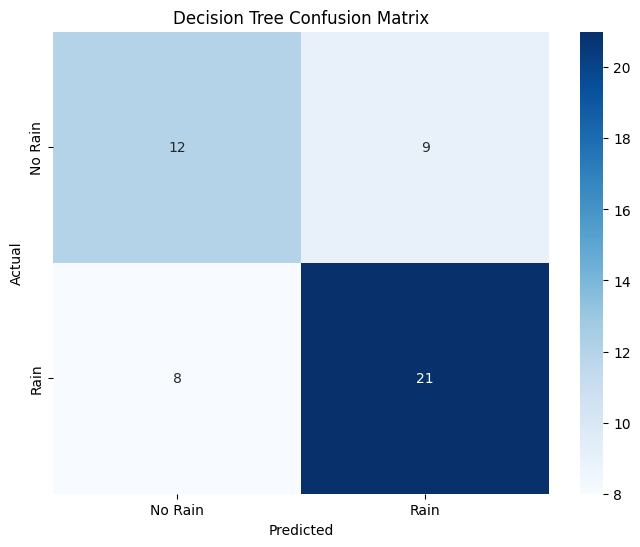

KNN Best Params: {'n_neighbors': 7}
KNN F1 Score: 0.7536231884057971
KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        21
           1       0.65      0.90      0.75        29

    accuracy                           0.66        50
   macro avg       0.68      0.61      0.60        50
weighted avg       0.67      0.66      0.63        50

KNN Accuracy: 0.66
------------------------------------------------------


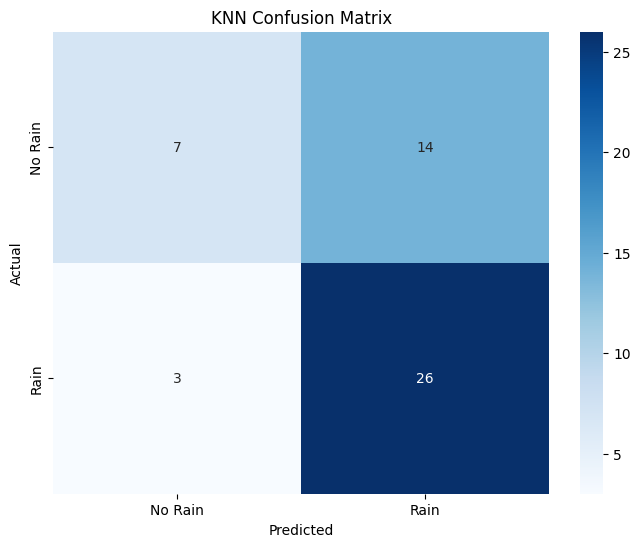

Naive Bayes Best Params: {}
Naive Bayes F1 Score: 0.75
Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        21
           1       0.69      0.83      0.75        29

    accuracy                           0.68        50
   macro avg       0.68      0.65      0.65        50
weighted avg       0.68      0.68      0.67        50

Naive Bayes Accuracy: 0.68
------------------------------------------------------


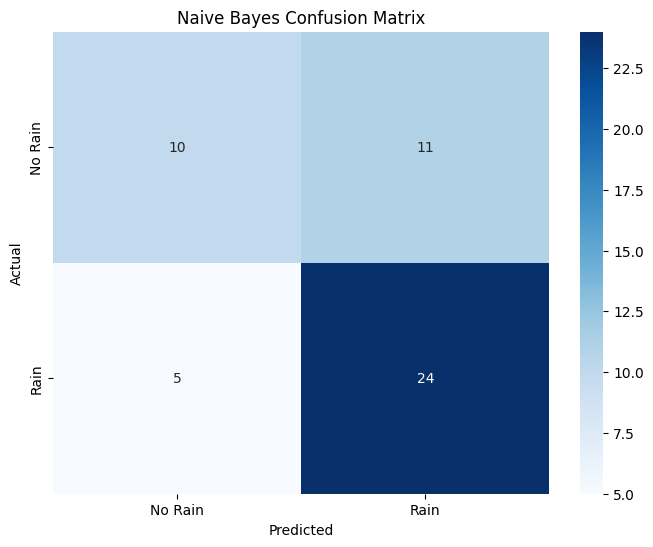

Gradient Boosting Best Params: {'n_estimators': 50}
Gradient Boosting F1 Score: 0.75
Gradient Boosting Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.48      0.56        21
           1       0.69      0.83      0.75        29

    accuracy                           0.68        50
   macro avg       0.68      0.65      0.65        50
weighted avg       0.68      0.68      0.67        50

Gradient Boosting Accuracy: 0.68
------------------------------------------------------


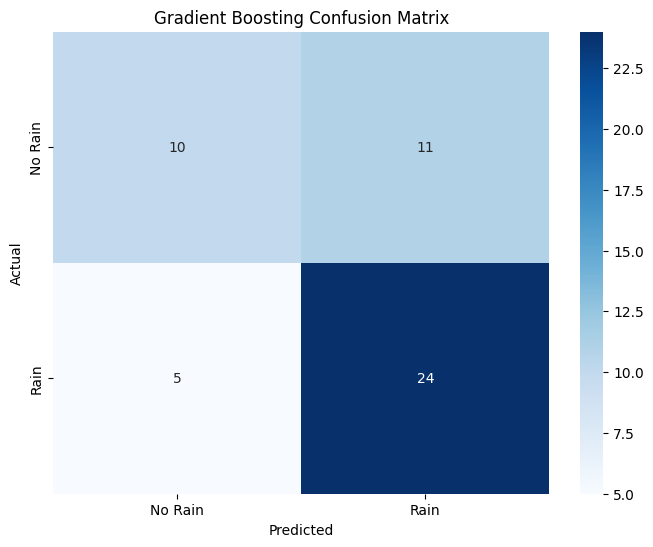

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

AdaBoost Best Params: {'n_estimators': 50}
AdaBoost F1 Score: 0.676923076923077
AdaBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        21
           1       0.61      0.76      0.68        29

    accuracy                           0.58        50
   macro avg       0.56      0.55      0.54        50
weighted avg       0.56      0.58      0.56        50

AdaBoost Accuracy: 0.58
------------------------------------------------------


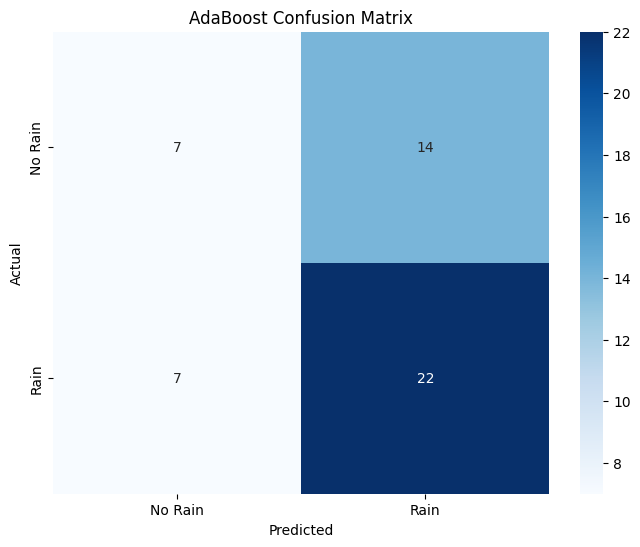

Bagging Best Params: {'n_estimators': 100}
Bagging F1 Score: 0.71875
Bagging Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.66      0.79      0.72        29

    accuracy                           0.64        50
   macro avg       0.63      0.61      0.61        50
weighted avg       0.63      0.64      0.63        50

Bagging Accuracy: 0.64
------------------------------------------------------


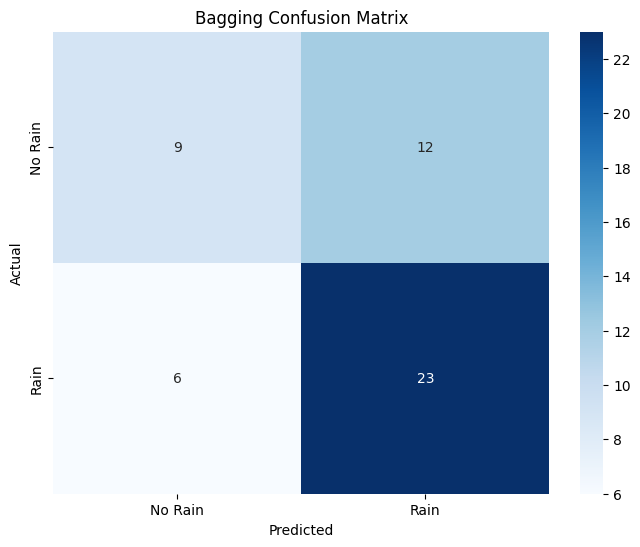

Extra Trees Best Params: {'n_estimators': 100}
Extra Trees F1 Score: 0.6774193548387096
Extra Trees Classification Report: 
              precision    recall  f1-score   support

           0       0.53      0.43      0.47        21
           1       0.64      0.72      0.68        29

    accuracy                           0.60        50
   macro avg       0.58      0.58      0.58        50
weighted avg       0.59      0.60      0.59        50

Extra Trees Accuracy: 0.6
------------------------------------------------------


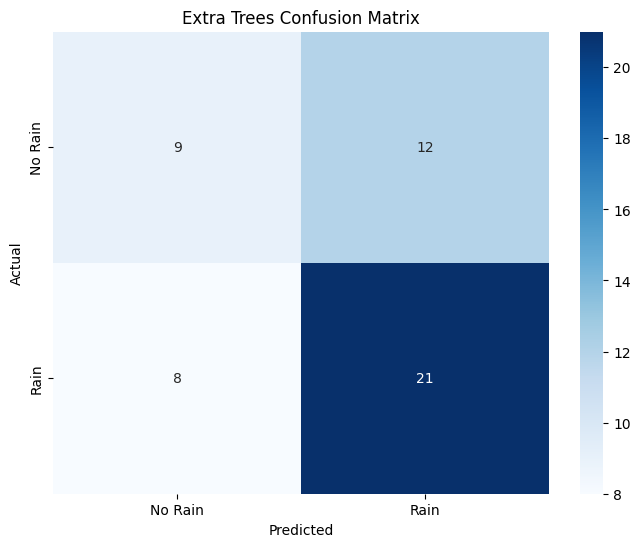

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier F1 Score: 0.746268656716418
['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN', 'Naive Bayes', 'Gradient Boosting', 'Bagging']


In [24]:

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score

X = df_processed_final.drop('rain_or_not', axis=1)
y = df_processed_final['rain_or_not']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()),
    ('Extra Trees', ExtraTreesClassifier())
]


param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},
    'Gradient Boosting': {'n_estimators': [50, 100, 200]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'Bagging': {'n_estimators': [50, 100, 200]},
    'Extra Trees': {'n_estimators': [50, 100, 200]}
}

best_models = {}
high_accuracy_models = []

for name, model in models:
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test)
    print(f'{name} Best Params: {grid_search.best_params_}')
    print(f'{name} F1 Score: {f1_score(y_test, y_pred)}')
    print(f'{name} Classification Report: \n{classification_report(y_test, y_pred)}')
    accuracy = (accuracy_score(y_test, y_pred))
    print(f'{name} Accuracy: {accuracy}')
    if accuracy > 0.6:
        high_accuracy_models.append(name)
    print('------------------------------------------------------')
    con_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()




voting_clf = VotingClassifier(estimators=[('lr', best_models['Logistic Regression']),
                                            ('rf', best_models['Random Forest']),
                                            ('svm', best_models['SVM']),
                                            ('dt', best_models['Decision Tree']),
                                            ('knn', best_models['KNN']),
                                            ('nb', best_models['Naive Bayes']),
                                            ('gb', best_models['Gradient Boosting']),
                                            ('ab', best_models['AdaBoost']),
                                            ('bc', best_models['Bagging']),
                                            ('et', best_models['Extra Trees'])],
                                voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print(f'Voting Classifier F1 Score: {f1_score(y_test, y_pred)}')


confusion_matrix(y_test, y_pred)


print(high_accuracy_models)

### **Model selection**

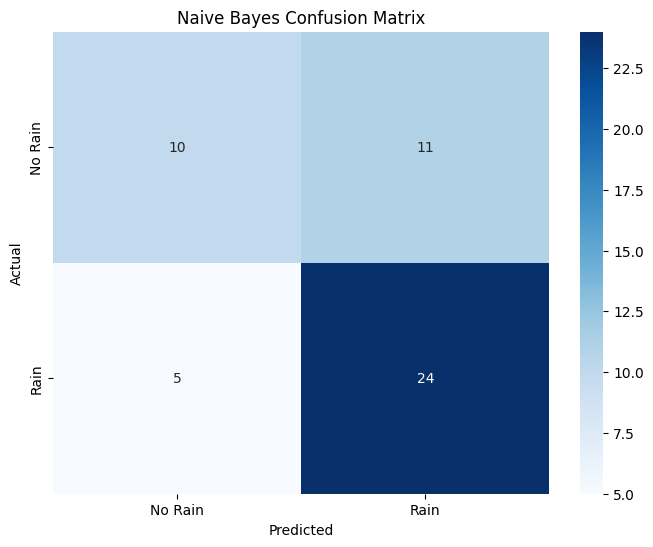

Predicted probabilities for the test set:
[0.97254704 0.99625577 0.8639475  0.990089   0.9941094  0.23338716
 0.11874741 0.91848178 0.86477045 0.99158874 0.6551332  0.55162922
 0.82666351 0.23283462 0.99591013 0.17839444 0.98169447 0.77080329
 0.8134456  0.84501266 0.99781417 0.99246944 0.95945898 0.29326471
 0.18760459 0.87248642 0.92731263 0.53723051 0.60979912 0.14753768
 0.76825046 0.38456414 0.23466308 0.39820021 0.89449411 0.15043018
 0.51102698 0.16259187 0.93494195 0.97219703 0.81971622 0.94342617
 0.97305687 0.88650544 0.25265325 0.93506613 0.116364   0.22008756
 0.94801743 0.76111737]


In [25]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
# print(f'Naive Bayes F1 Score: {f1_score(y_test, y_pred_nb)}')
# print(f'Naive Bayes Classification Report: \n{classification_report(y_test, y_pred_nb)}')
# print(f'Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}')

# Confusion matrix
con_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Display predicted probabilities
print("Predicted probabilities for the test set:")
print(y_pred_proba_nb)